In [48]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv('bank.csv')

# 分析

In [50]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [51]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002281D984550>,
      dtype=object)

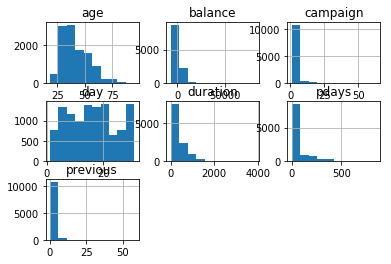

In [52]:
df.hist()

## 出現回数

In [53]:
df["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [54]:
df["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [55]:
df["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [56]:
df["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [57]:
df["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [58]:
df["loan"].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [59]:
df["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [60]:
df["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [61]:
df["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [62]:
df["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

# Xとyに分ける

In [63]:
train = df.drop(['deposit'], axis=1)

In [64]:
train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown


In [65]:
train_y = df['deposit']

In [66]:
train_y.head(3)

0    yes
1    yes
2    yes
Name: deposit, dtype: object

In [67]:
type(train)

pandas.core.frame.DataFrame

# one-hotエンコーディング

In [68]:
# one-hotエンコーディング
ohe_columns = ['job',
               'marital',
               'education',
               'default',
               'housing',
               'loan',
               'contact',
               'month',
               'poutcome',
               'deposit']

df_ohe = pd.get_dummies(df,
                       dummy_na=True,
                       columns=ohe_columns)

print('df_ohe shape:(%i,%i)' % df_ohe.shape)
df_ohe.head()

df_ohe shape:(11162,63)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_sep,month_nan,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan,deposit_no,deposit_yes,deposit_nan
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


## ヒートマップ

In [69]:
# df_ohe.astype(float)
plt.figure(figsize=(500, 300))
colormap = plt.cm.RdBu
sns.heatmap(df_ohe.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [70]:
pd.set_option("display.max_columns", 100)

In [71]:
df_ohe.corr()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,job_nan,marital_divorced,marital_married,marital_single,marital_nan,education_primary,education_secondary,education_tertiary,education_unknown,education_nan,default_no,default_yes,default_nan,housing_no,housing_yes,housing_nan,loan_no,loan_yes,loan_nan,contact_cellular,contact_telephone,contact_unknown,contact_nan,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_nan,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan,deposit_no,deposit_yes,deposit_nan
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,-0.057458,-0.066567,0.024176,0.082739,-0.046492,0.555863,-0.023163,-0.077879,-0.231846,-0.082716,-0.003582,0.037512,NaN,0.186349,0.318436,-0.467799,NaN,0.231150,-0.094400,-0.101372,0.077761,NaN,0.011425,-0.011425,NaN,0.168700,-0.168700,NaN,0.031418,-0.031418,NaN,-0.085019,0.210912,-0.037860,NaN,-0.024823,0.053137,0.037799,0.016322,0.016675,-0.003606,0.009046,0.029346,-0.122287,0.020910,0.067004,0.040306,NaN,-0.008071,-0.018715,0.062114,-0.027021,NaN,-0.034901,0.034901,NaN
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,-0.038001,-0.046220,0.005039,-0.007987,0.044912,0.075423,0.020264,-0.041646,-0.001571,0.003802,-0.012050,0.010269,NaN,-0.017586,0.025431,-0.014994,NaN,-0.000673,-0.070609,0.069128,0.014596,NaN,0.060954,-0.060954,NaN,0.077092,-0.077092,NaN,0.084589,-0.084589,NaN,0.007816,0.060350,-0.046237,NaN,0.019151,0.006440,0.037325,0.003358,-0.020869,-0.057409,0.007900,0.029131,-0.060661,0.077362,0.030111,0.021383,NaN,0.001695,0.028521,0.045603,-0.046091,NaN,-0.081129,0.081129,NaN
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.013901,-0.023039,-0.004463,0.013318,0.008711,-0.004511,0.006458,0.002497,-0.010472,0.027038,-0.002656,-0.001895,NaN,0.001368,0.002832,-0.003961,NaN,-0.006896,-0.010395,0.010393,0.012894,NaN,-0.017342,0.017342,NaN,0.014770,-0.014770,NaN,-0.017269,0.017269,NaN,-0.011402,0.014687,0.003401,NaN,0.105990,-0.007713,-0.013936,-0.231026,0.214215,0.129350,-0.181728,-0.041973,-0.010188,0.062185,0.079939,-0.072279,NaN,-0.068381,-0.007526,-0.044280,0.082807,NaN,0.056326,-0.056326,NaN
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,-0.025542,0.029986,-0.000908,-0.010807,-0.016546,0.014194,0.013506,0.012077,-0.021732,-0.010440,0.026628,-0.009526,NaN,0.021364,-0.036179,0.023847,NaN,0.013405,0.003820,-0.006813,-0.015887,NaN,0.009760,-0.009760,NaN,-0.035051,0.035051,NaN,0.001914,-0.001914,NaN,0.020938,-0.015966,-0.013107,NaN,0.023119,-0.022778,0.007203,-0.022733,-0.011565,0.053493,-0.007325,-0.036984,0.010680,-0.007683,-0.013847,-0.010389,NaN,-0.033966,-0.008782,-0.022578,0.044006,NaN,-0.451919,0.451919,NaN
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.017881,0.005522,0.013883,0.010570,0.015988,-0.037943,0.001776,0.007496,-0.022735,0.021738,-0.024973,0.008093,NaN,-0.006828,0.047722,-0.046165,NaN,0.019915,-0.013834,-0.005427,0.012976,NaN,-0.030975,0.030975,NaN,-0.006660,0.006660,NaN,-0.034722,0.034722,NaN,-0.067236,0.046576,0.045016,NaN,-0.074485,0.146743,-0.011971,-0.035398,-0.051019,0.114413,0.044453,-0.029530,-0.038520,-0.077215,-0.069786,-0.049224,NaN,-0.080188,-0.023689,-0.091807,0.131392,NaN,0.128081,-0.128081,NaN
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.044068,-0.030695,-0.029732,-0.025950,0.015704,0.004212,-0.011224,0.000595,0.029129,-0.016588,0.007781,0.003213,NaN,-0.015574,-0.019280,0.031280,NaN,-0.041135,0.017792,0.011566,-0.001479,NaN,0.036282,-0.036282,NaN,-0.064497,0.064497,NaN,0.030416,-0.030416,NaN,0.205877,0.006710,-0.230944,NaN,0.079165,-0.067151,0.056731,0.053023,0.018510,-0.099486,-0.094826,0.021950,0.026120,-0.011859,0.07431

# 不要なものを削除

# アンサンブル & スタッキング(積み重ね)モデル

## Pythonクラスによるヘルパー

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
# kf = KFold(ntrain, n_folds=NFOLDS, random_state=SEED)
kf = KFold(n_splits=NFOLDS,
           shuffle=False,
           random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def feature_importances(self, x, y):
        print(self.clf.fit(x, y).feature_importances_)

# Class to extend XGboost classifier

NameError: name 'train' is not defined

## Out-of-Fold Predictions

In [126]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
#     for i, (train_index, test_index) in enumerate(kf):

#     df_y_train = pd.DataFrame(y_train)
#     for i, (train_index, test_index) in enumerate(kf.split(df_y_train)):
    for i, (train_index, test_index) in enumerate(kf.split(train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.train(x_tr, y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
    
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [127]:
# df_y_train = pd.DataFrame(y_train)
# display(df_y_train)

# 基本となる最初のレベルのモデルたち

In [128]:
# ランダムフォレストのパラメータ
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True,
    #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'verbose': 0
}

# Extra Treesのパラメータ
et_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoostのパラメータ
ada_params = {
    'n_estimators': 500,
    'learning_rate': 0.75
}

# Gradient Boostingのパラメータ
gb_params = {
    'n_estimators': 500,
    #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# SVCのパラメータ
svc_params = {
    'kernel': 'linear',
    'C': 0.025
}

In [25]:
# 4つのモデルを表す5つのオブジェクトを生成する
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=ada_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

NameError: name 'SklearnHelper' is not defined